In [7]:
import cira 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from os.path import exists

cira.auth.KEY_FILE = ""
assert not cira.auth.check_keys()

SYMBOL = "ETH/BTC" 
SYM_HIST_FILE = f'./{SYMBOL.replace("/", "_")}.csv'

stk = cira.Cryptocurrency(SYMBOL)

if not exists(SYM_HIST_FILE): # chacheing historical data  
    start = datetime(2021, 1, 1)
    end = datetime.now().date() 
    stk.save_historical_data(SYM_HIST_FILE, start, end)

data = stk.load_historical_data(SYM_HIST_FILE)
data.index = data.index.date 
data.head()

,symbol,open,high,low,close,volume,trade_count,vwap
2021-01-01,ETH/BTC,0.025395,0.025462,0.024584,0.024730,2661.554,1539.0,0.025027
2021-01-02,ETH/BTC,0.024780,0.024928,0.023101,0.023336,5258.725,3646.0,0.024144
2021-01-03,ETH/BTC,0.023298,0.033231,0.023093,0.033016,17071.538,13059.0,0.028290
2021-01-04,ETH/BTC,0.033027,0.035000,0.030059,0.032538,15394.346,16515.0,0.032639
2021-01-05,ETH/BTC,0.032528,0.033263,0.030819,0.031542,6229.154,6757.0,0.032231


<Axes: xlabel='timestamp'>

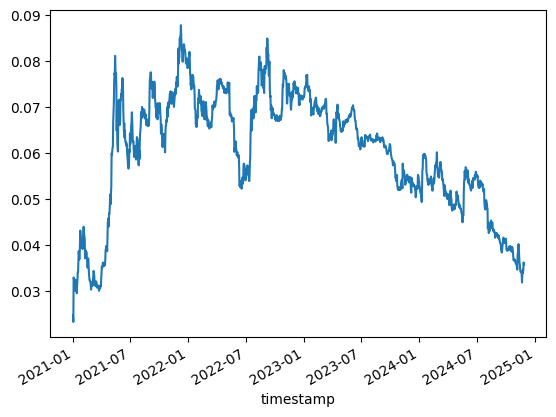

In [2]:
data["close"].plot()

<Axes: xlabel='timestamp'>

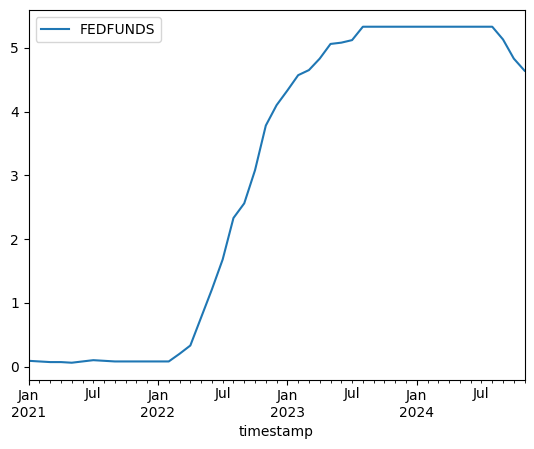

In [10]:
fed = pd.read_csv("./FEDFUNDS.csv")
fed["timestamp"] = pd.to_datetime(fed["DATE"])
fed.drop(columns=["DATE"], inplace=True)
fed.set_index(keys=["timestamp"], inplace=True)
fed = fed.loc[str(datetime(2021, 1, 1)):]
fed.head()
fed.plot()

In [9]:
data.join(fed, how="outer").ffill()

,symbol,open,high,low,close,volume,trade_count,vwap,FEDFUNDS
2021-01-01,ETH/BTC,0.025395,0.025462,0.024584,0.024730,2661.554,1539.0,0.025027,0.09
2021-01-02,ETH/BTC,0.024780,0.024928,0.023101,0.023336,5258.725,3646.0,0.024144,0.09
2021-01-03,ETH/BTC,0.023298,0.033231,0.023093,0.033016,17071.538,13059.0,0.028290,0.09
2021-01-04,ETH/BTC,0.033027,0.035000,0.030059,0.032538,15394.346,16515.0,0.032639,0.09
2021-01-05,ETH/BTC,0.032528,0.033263,0.030819,0.031542,6229.154,6757.0,0.032231,0.09
...,...,...,...,...,...,...,...,...,...
2024-11-22,ETH/BTC,0.034166,0.034298,0.032905,0.033914,0.000,0.0,0.000000,4.64
2024-11-23,ETH/BTC,0.033870,0.035457,0.033860,0.034751,0.000,0.0,0.000000,4.64
2024-11-24,ETH/BTC,0.034745,0.034856,0.034005,0.034502,0.000,0.0,0.000000,4.64
2024-11-25,ETH/BTC,0.034452,0.036930,0.034404,0.036268,0.000,0.0,0.000000,4.64
